# Visualizing Camera Distortion

### Task

1. Pick one of the distortion model of your choice: KB4 or DS
    1. For KB4, parameter is given as [fx, fy, cu, cv, k1, k2, k3, k4] = [622, 622, 965, 631, -0.256, -0.0015, 0.0007, -0.0002]
    2. For DS, the parameter is given as [fx, fy, cu, cv, xi, alpha] = [454, 454, 965, 631, -0.2707, 0.5897]
    3. For both the image resolution is [width, height] = [1920, 1200]
2. Visualize in Python script, the distortion effect, from a perfect pinhole camera
    1. You should visualize such that we know the pixels from the ideal perspective camera is contracting inwards to obtain the fisheye image
    2. The key understanding here is to have a code piece that transforms a given [x,y] point on the image coordinate, to the distorted [x’, y’] coordinates. The transformation is defined by the camera model and the parameters.
3. Write one paragraph to explain your thought process, experiments and final results. It is OK if you didn’t fully complete the visualization


The goal is to relate the fisheye projection model to the ideal pinhole camera model. So:
- **Given:** Pinhole camera image
- **Find:** Fisheye camera image

### Pinhole Camera Model
$$
\begin{bmatrix} u \\ v \end{bmatrix} = 
\begin{bmatrix} f_x \frac{X}{Z} \\ f_y \frac{Y}{Z} \end{bmatrix} +
\begin{bmatrix} c_u \\ c_v \end{bmatrix}
$$

### Kannala-Brandt Fisheye Camera Model
$$
\begin{bmatrix} u' \\ v' \end{bmatrix} = 
\begin{bmatrix} f_x \frac{X}{R} d(\theta) \\ f_y \frac{Y}{R} d(\theta) \end{bmatrix} +
\begin{bmatrix} c_u \\ c_v \end{bmatrix}
$$
where
$$
\begin{align}
R &= \sqrt{X^2 + Y^2} \\
\theta &= atan2(R,Z) \\
d(\theta) &= \theta + k_1\theta^3 + k_2\theta^5 + k_3\theta^7 + k_4\theta^9
\end{align}
$$

Define given variables

In [1]:
fx = 622
fy = 622
cu = 965
cv = 631
k1 = -0.256
k2 = -0.0015
k3 = 0.0007
k4 = -0.0002

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Assume that we're given an image of points arranged in a grid-like fashion under the pinhole projection model. To retrieve the fisheye version of the image, unproject the grid of points and reproject it under the fisheye camera model. In this case, we can reasonably assume that $Z = 1$ for the purposes of plotting a quiver plot.

Create $H \times W = 120 \times 192$ grid of points

In [3]:
x = np.linspace(0,19-1,19) * 100 # x-axis
y = np.linspace(0,12-1,12) * 100 # y-axis
X, Y = np.meshgrid(x,y)

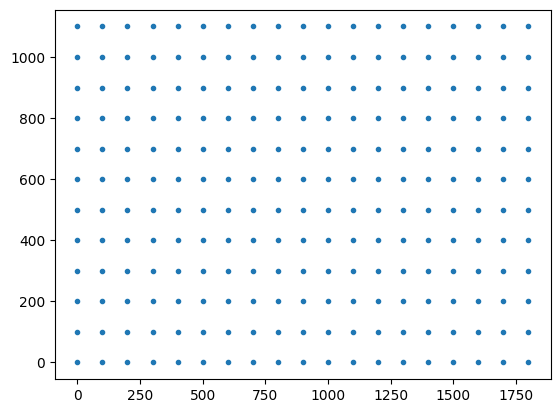

In [4]:
plt.scatter(X, Y, marker='.')

Create distortion function

In [5]:
def distort_points(U, V):
    # Calculate world X and Y coordinates under assumption that Z=1
    world_X = (U - cu) / fx
    world_Y = (V - cv) / fy

    R = np.sqrt(world_X**2 + world_Y**2)
    theta = np.arctan2(R, 1.0)
    delta = theta + (k1 * theta**3) + (k2 * theta**5) + (k3 * theta**7) + (k4 * theta**9)

    distorted_U_prime = fx * world_X / (R + 1e-10) * delta + cu
    distorted_V_prime = fy * world_Y / (R + 1e-10)* delta + cv
    
    return distorted_U_prime, distorted_V_prime

In [6]:
distorted_U_prime, distorted_V_prime = distort_points(X, Y)

Show distorted points

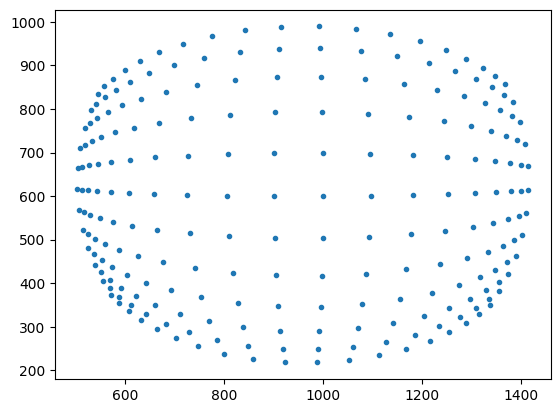

In [7]:
plt.scatter(distorted_U_prime,distorted_V_prime, marker='.')

Show quiver plot

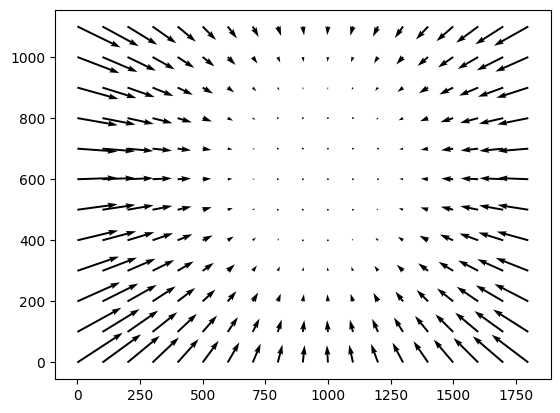

In [8]:
plt.quiver(X, Y, distorted_U_prime-X, distorted_V_prime-Y)